Here, I have used the  **Heart Attack Risk Factors Dataset** from kaggle. Below is the link to the dataset.
https://www.kaggle.com/datasets/waqi786/heart-attack-dataset

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
file_path = "/content/drive/MyDrive/ML Assignment/heart_attack_dataset.csv"
data = pd.read_csv(file_path)

In [19]:
data.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


**UNIVARIATE ANALYSIS**

<ipython-input-20-95de39f7dcaf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


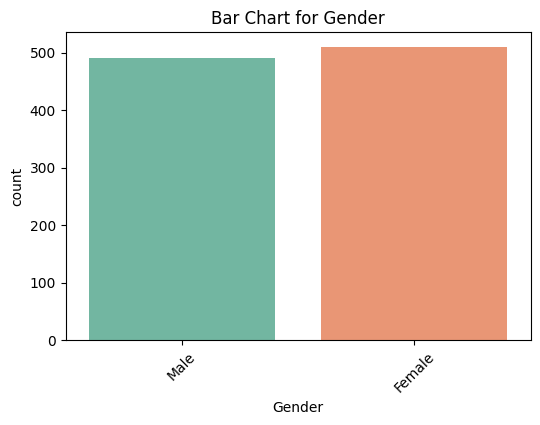

<ipython-input-20-95de39f7dcaf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


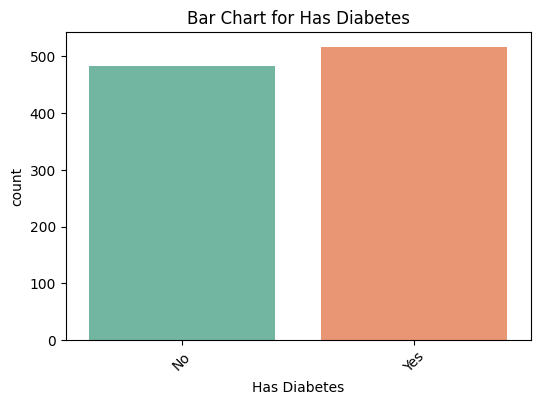

<ipython-input-20-95de39f7dcaf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


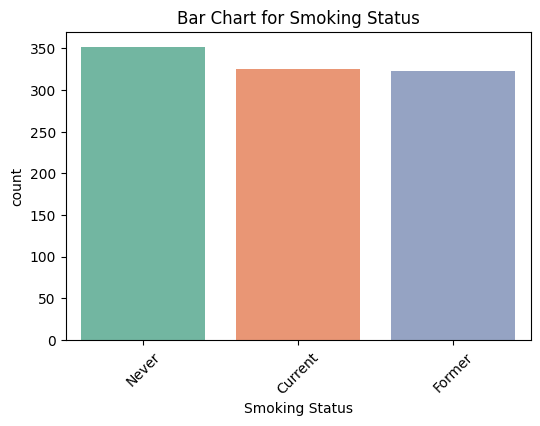

<ipython-input-20-95de39f7dcaf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


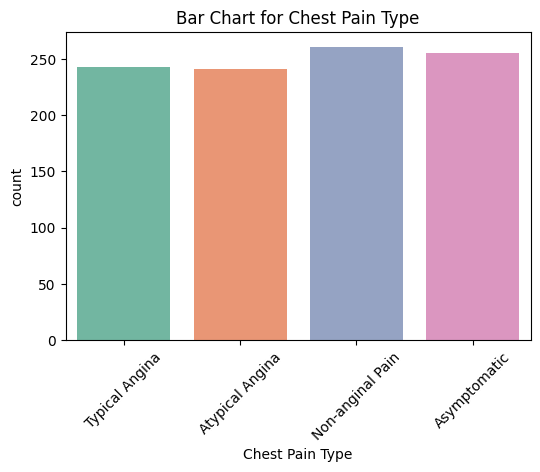

<ipython-input-20-95de39f7dcaf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


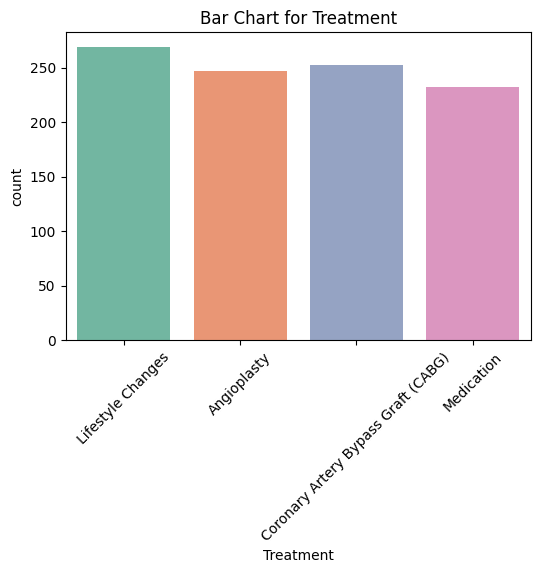

In [20]:
# Bar charts for categorical variables
categorical_cols = ['Gender', 'Has Diabetes', 'Smoking Status', 'Chest Pain Type', 'Treatment']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data[col], palette='Set2')
    plt.title(f'Bar Chart for {col}')
    plt.xticks(rotation=45)
    plt.show()


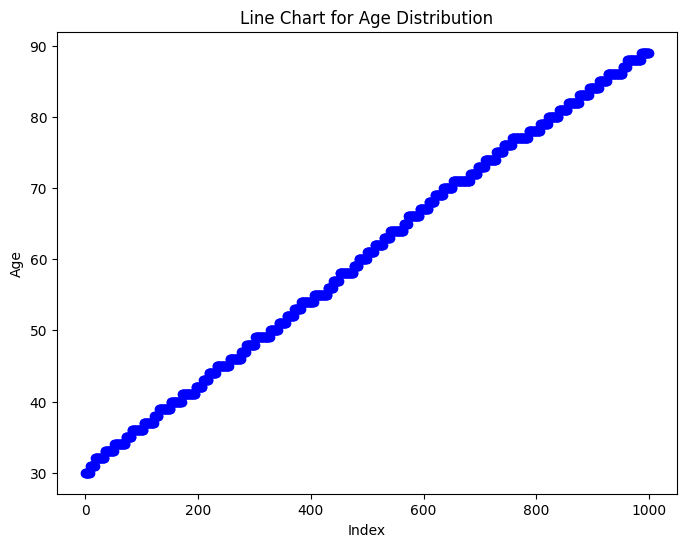

In [21]:
# Line chart for Age distribution (sorted)
plt.figure(figsize=(8, 6))
plt.plot(sorted(data['Age']), marker='o', color='blue')
plt.title('Line Chart for Age Distribution')
plt.xlabel('Index')
plt.ylabel('Age')
plt.show()


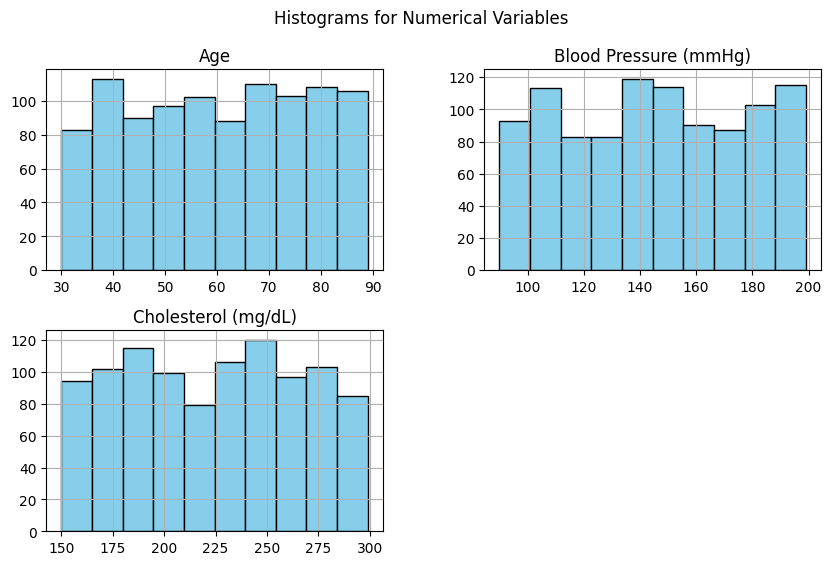

In [22]:
# Histograms for numerical variables
numerical_cols = ['Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)']

data[numerical_cols].hist(bins=10, figsize=(10, 6), color='skyblue', edgecolor='black')
plt.suptitle('Histograms for Numerical Variables')
plt.show()


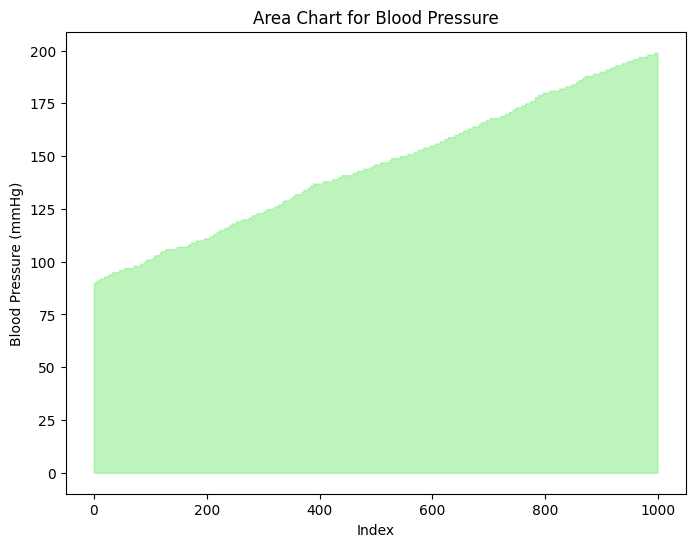

In [23]:
# Area chart for Blood Pressure
plt.figure(figsize=(8, 6))
plt.fill_between(range(len(data)), sorted(data['Blood Pressure (mmHg)']), color='lightgreen', alpha=0.6)
plt.title('Area Chart for Blood Pressure')
plt.xlabel('Index')
plt.ylabel('Blood Pressure (mmHg)')
plt.show()


**MULTIVARIATE ANALYSIS**

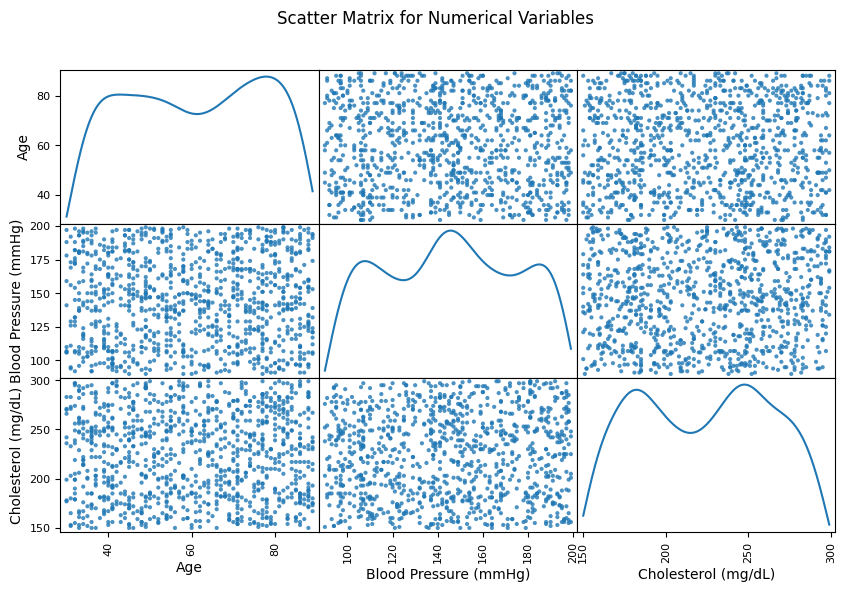

In [24]:
# Scatter matrix for numerical variables
from pandas.plotting import scatter_matrix

# Selecting only numerical columns
scatter_matrix(data[numerical_cols], figsize=(10, 6), alpha=0.8, diagonal='kde')
plt.suptitle('Scatter Matrix for Numerical Variables')
plt.show()


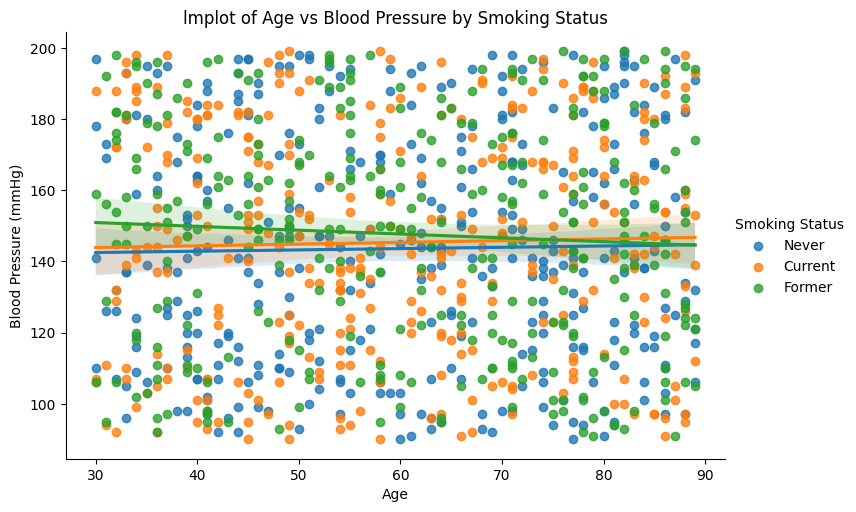

In [25]:
# lmplot for Age vs Blood Pressure colored by Smoking Status
sns.lmplot(x='Age', y='Blood Pressure (mmHg)', hue='Smoking Status', data=data, aspect=1.5)
plt.title('lmplot of Age vs Blood Pressure by Smoking Status')
plt.show()


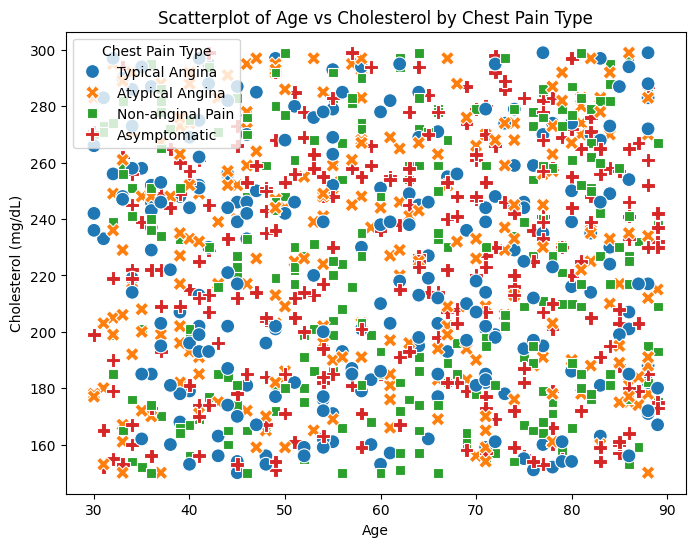

In [26]:
# Scatterplot of Age vs Cholesterol colored by Chest Pain Type
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Cholesterol (mg/dL)', hue='Chest Pain Type', style='Chest Pain Type', s=100, data=data)
plt.title('Scatterplot of Age vs Cholesterol by Chest Pain Type')
plt.show()


In [27]:
# Group by Smoking Status and calculate mean and variance for numerical columns
summary_stats = data.groupby('Smoking Status')[numerical_cols].agg(['mean', 'var'])
print("Summary Statistics (Mean and Variance) Per Group (Smoking Status):")
print(summary_stats)


Summary Statistics (Mean and Variance) Per Group (Smoking Status):
                      Age             Blood Pressure (mmHg)               \
                     mean         var                  mean          var   
Smoking Status                                                             
Current         59.600000  297.413580            145.313846  1003.376505   
Former          61.080495  311.881699            147.569659   994.972617   
Never           60.338068  291.888233            143.602273  1023.744496   

               Cholesterol (mg/dL)               
                              mean          var  
Smoking Status                                   
Current                 225.203077  1908.866040  
Former                  221.885449  1825.350191  
Never                   224.230114  1768.781655  


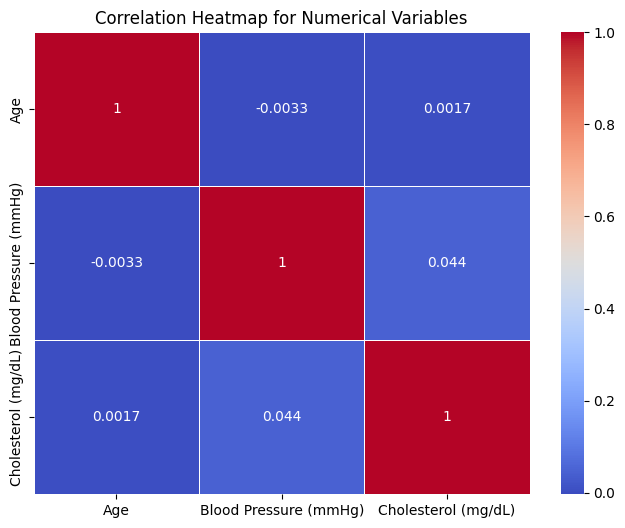

In [28]:
# Correlation matrix
corr_matrix = data[numerical_cols].corr()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()


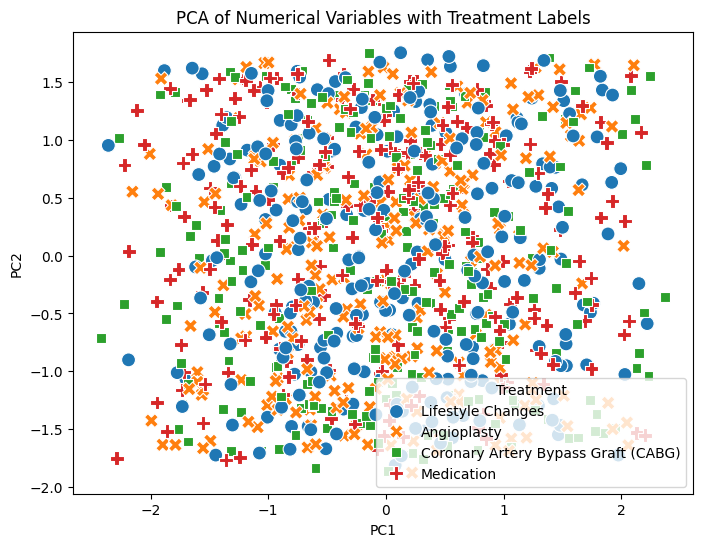

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Age', 'Blood Pressure (mmHg)', 'Cholesterol (mg/dL)']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_cols])


pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, data['Treatment'].reset_index(drop=True)], axis=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Treatment', style='Treatment', s=100, data=pca_df)
plt.title('PCA of Numerical Variables with Treatment Labels')
plt.show()
